In [1]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
import nltk
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tejasrikurapati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tejasrikurapati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import pandas as pd

In [16]:
reddit = pd.read_csv('/Users/tejasrikurapati/Downloads/reddit.csv')

In [17]:
reddit = reddit.drop(['Unnamed: 0'],axis=1)

In [54]:
def basic_clean(text):
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ['really','I','know','He'] 
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [55]:
words = basic_clean(''.join(str(reddit['data'].tolist())))

In [56]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())

(15, year, old)               6
(couldnt, done, Was)          6
(year, old, girl)             5
(ex, best, friend)            4
(ten, year, ago)              4
                             ..
(remember, twirling, hair)    1
(publicise, story, could)     1
(Nanjiani, nLaVerne, Cox)     1
(let, finish, go)             1
(someone, took, video)        1
Length: 29048, dtype: int64

In [57]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:100]

In [58]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

Text(0.5, 0, '# of Occurances')

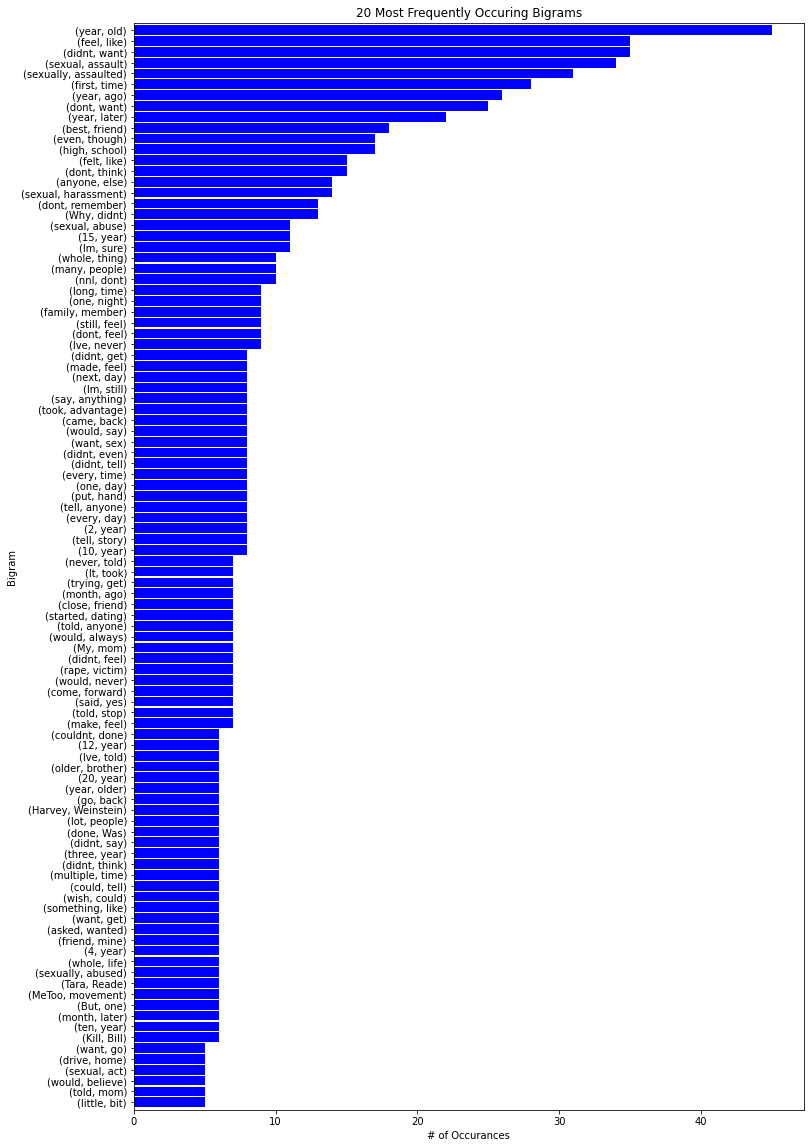

In [59]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 20))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

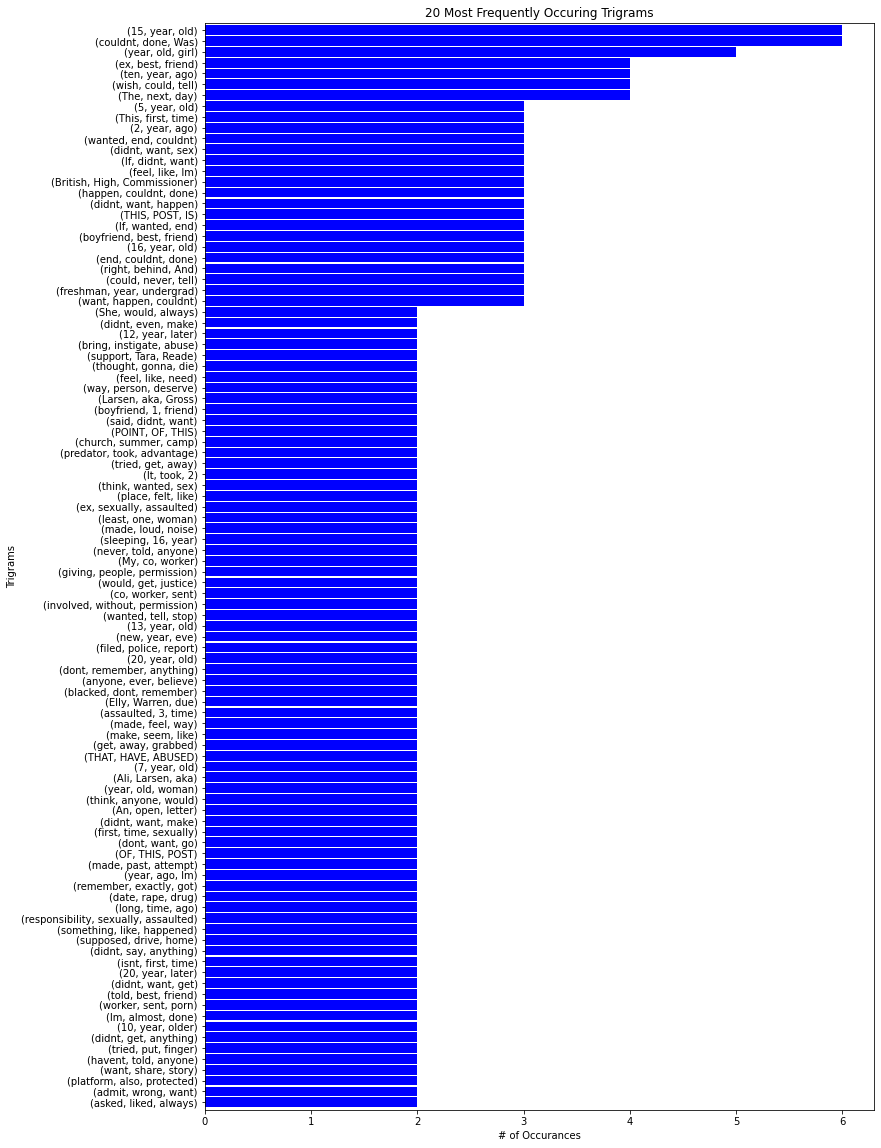

In [60]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 20))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('# of Occurances')

In [61]:
from nltk.tokenize import word_tokenize 

In [62]:
reddit['data'] = reddit['data'].astype('str')

In [64]:
reddit['data'] = reddit['data'].apply(word_tokenize)

TypeError: expected string or bytes-like object

In [66]:
corpus = []
corpus = reddit['data']

In [67]:
import numpy as np
import itertools
from scipy.sparse import csr_matrix

def create_co_occurences_matrix(allowed_words, documents):
    print(f"allowed_words:\n{allowed_words}")
    print(f"documents:\n{documents}")
    word_to_id = dict(zip(allowed_words, range(len(allowed_words))))
    documents_as_ids = [np.sort([word_to_id[w] for w in doc if w in word_to_id]).astype('uint32') for doc in documents]
    row_ind, col_ind = zip(*itertools.chain(*[[(i, w) for w in doc] for i, doc in enumerate(documents_as_ids)]))
    data = np.ones(len(row_ind), dtype='uint32')  # use unsigned int for better memory utilization
    max_word_id = max(itertools.chain(*documents_as_ids)) + 1
    docs_words_matrix = csr_matrix((data, (row_ind, col_ind)), shape=(len(documents_as_ids), max_word_id))  # efficient arithmetic operations with CSR * CSR
    words_cooc_matrix = docs_words_matrix.T * docs_words_matrix  # multiplying docs_words_matrix with its transpose matrix would generate the co-occurences matrix
    words_cooc_matrix.setdiag(0)
    print(f"words_cooc_matrix:\n{words_cooc_matrix.todense()}")
    return words_cooc_matrix, word_to_id

In [68]:
allowed_words = ['story','painful','triggering','women', 'harasment','trust','come-out','thank']
words_cooc_matrix, word_to_id = create_co_occurences_matrix(allowed_words, corpus)

allowed_words:
['story', 'painful', 'triggering', 'women', 'harasment', 'trust', 'come-out', 'thank']
documents:
0      [This, is, Ali, Larsen, aka, Gross, Gore, ., O...
1      [My, Father, ,, Filmmaker, Rob, Cohen, is, a, ...
2      [Tara, Reade, on, Rising, //, What, we, see, h...
3      [Asia, Argento, ,, Who, Accused, Weinstein, ,,...
4      [DONT, LET, HER, STORY, BE, SILENCED, ., We, c...
                             ...                        
369    [The, Woman, I, Was, Last, week, ,, my, counse...
370    [I, made, a, throwaway, account, just, to, say...
371    [Years, ago, I, told, my, therapist, that, I, ...
372    [Hey, guys, ,, I, just, wanted, to, let, you, ...
373    [hi, ., i, realized, that, sexual, assult, awa...
Name: data, Length: 374, dtype: object
words_cooc_matrix:
[[ 0  6  6 20  0  1  0  2]
 [ 6  0  2  9  0  0  0  0]
 [ 6  2  0  0  0  0  0  0]
 [20  9  0  0  0  2  0  3]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  0  3

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [69]:
allowed_words = ['harassment','misconduct','trump','white','house','president','power','victim']
words_cooc_matrix, word_to_id = create_co_occurences_matrix(allowed_words, corpus)

allowed_words:
['harassment', 'misconduct', 'trump', 'white', 'house', 'president', 'power', 'victim']
documents:
0      [This, is, Ali, Larsen, aka, Gross, Gore, ., O...
1      [My, Father, ,, Filmmaker, Rob, Cohen, is, a, ...
2      [Tara, Reade, on, Rising, //, What, we, see, h...
3      [Asia, Argento, ,, Who, Accused, Weinstein, ,,...
4      [DONT, LET, HER, STORY, BE, SILENCED, ., We, c...
                             ...                        
369    [The, Woman, I, Was, Last, week, ,, my, counse...
370    [I, made, a, throwaway, account, just, to, say...
371    [Years, ago, I, told, my, therapist, that, I, ...
372    [Hey, guys, ,, I, just, wanted, to, let, you, ...
373    [hi, ., i, realized, that, sexual, assult, awa...
Name: data, Length: 374, dtype: object
words_cooc_matrix:
[[ 0  0  0  3  0  0  3 21]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 3  0  0  0 10  0  3 12]
 [ 0  0  0 10  0  0  3  0]
 [ 0  0  0  0  0  0  0  0]
 [ 3  0  1  3  3  0  0  2]
 [21  0  0 1